# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import shap
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
import joblib

# **Load Data**

In [2]:
!wget https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv
# 2. Load data dari raw GitHub URL
df = pd.read_csv('employee_data.csv')

# 3. Cek 5 baris awal
df.head()

--2025-05-28 14:50:32--  https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226188 (221K) [text/plain]
Saving to: ‘employee_data.csv’

employee_data.csv   100%[===================>] 220.89K  --.-KB/s    in 0.03s   

2025-05-28 14:50:32 (8.60 MB/s) - ‘employee_data.csv’ saved [226188/226188]



,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Kode ini digunakan untuk mengunduh dan memuat dataset karyawan dari repositori GitHub milik Dicoding. File CSV diunduh menggunakan perintah wget, kemudian dibaca ke dalam sebuah DataFrame menggunakan pandas.read_csv(). Setelah data berhasil dimuat, fungsi df.head() digunakan untuk menampilkan lima baris pertama dari dataset, guna melakukan inspeksi awal terhadap struktur data dan isi kolom. Langkah ini penting sebagai bagian dari proses eksplorasi data sebelum dilakukan analisis lebih lanjut.

# **EDA**

In [3]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Berdasarkan hasil analisis deskriptif, terdapat beberapa kolom seperti Age, DistanceFromHome, dan lainnya yang secara statistik memungkinkan **adanya outlier**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
# Cek jumlah duplikat berdasarkan movie_id
print("Data duplikat pada employee data: ",df.duplicated().sum())
print("Data null pada employee data: ",df.isnull().sum())

Data duplikat pada employee data:  0
Data null pada employee data:  EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
Trai

Berdasarkan hasil pemeriksaan kualitas data,** tidak ditemukan adanya data duplikat dalam dataset**, yang menunjukkan bahwa setiap entri bersifat unik. Namun, ditemukan adanya** 412 nilai kosong (null)** pada kolom Attrition.

In [6]:
df['Attrition'].value_counts()

,count
Attrition,
0.0,879
1.0,179


Kolom Attrition merepresentasikan status karyawan, di mana nilai **0 menunjukkan karyawan yang tidak mengundurkan diri (aktif)**, sedangkan **nilai 1 menunjukkan karyawan yang telah mengundurkan diri (resign)**. Berdasarkan distribusi data, terdapat 879 karyawan aktif dan 179 karyawan yang telah resign. Informasi ini menunjukkan adanya ketidakseimbangan kelas yang perlu dipertimbangkan dalam proses pemodelan, terutama jika menggunakan algoritma yang sensitif terhadap distribusi target.

In [7]:
df['Gender'].value_counts()

,count
Gender,
Male,882
Female,588


Berdasarkan hasil analisis terhadap kolom Gender, ditemukan bahwa jumlah karyawan laki-laki lebih banyak dibandingkan dengan karyawan perempuan.

In [8]:
pd.crosstab(df['Department'], df['Attrition'])

Attrition,0.0,1.0
Department,,
Human Resources,32,6
Research & Development,594,107
Sales,253,66


Berdasarkan analisis tingkat attrition per departemen, ditemukan bahwa jumlah karyawan yang mengundurkan diri **paling sedikit berasal dari divisi Human Resources (HR)**, sementara **jumlah attrition tertinggi tercatat pada departemen Research and Development, yaitu sebanyak 107 karyawan.**

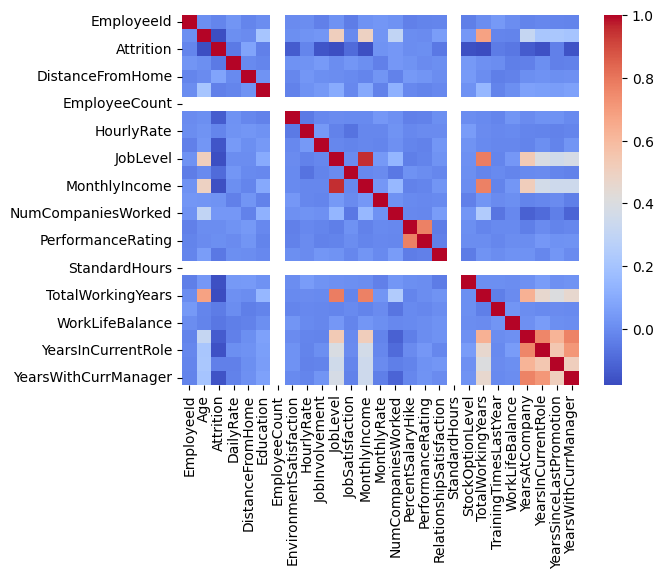

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap='coolwarm')

# Display the plot
plt.show()

Berdasarkan hasil visualisasi korelasi melalui heatmap, karena variabel target dalam analisis ini adalah Attrition, maka kolom-kolom seperti **EmployeeCount dan StandardHours** dianggap tidak relevan untuk pemodelan. Hal ini disebabkan oleh tidak adanya variasi nilai dalam kolom tersebut, sehingga tidak memberikan kontribusi informatif terhadap prediksi Attrition.

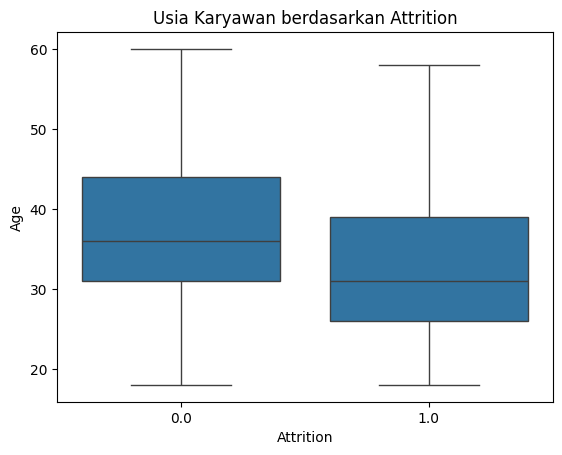

In [10]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Usia Karyawan berdasarkan Attrition')
plt.show()

Karyawan dengan status Attrition 0 (tidak mengundurkan diri) rata-rata berusia antara 30 hingga 40 tahun, sedangkan karyawan dengan status Attrition 1 (mengundurkan diri) umumnya berada pada rentang usia sekitar 28 hingga kurang dari 40 tahun

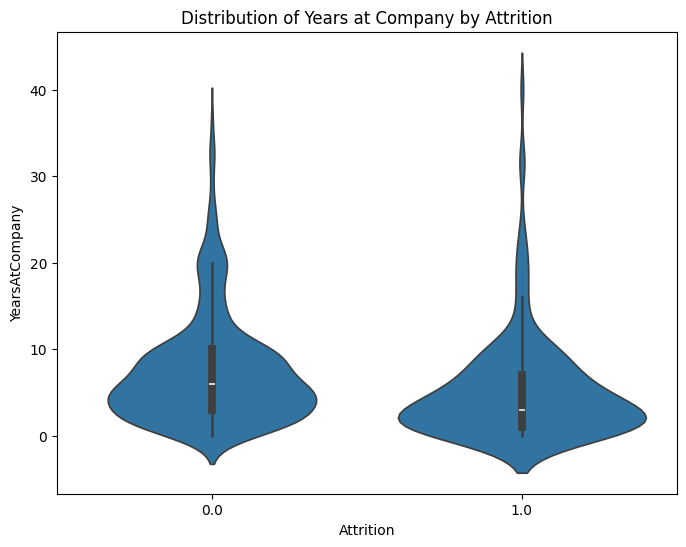

In [11]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Attrition', y='YearsAtCompany', data=df)

plt.title('Distribution of Years at Company by Attrition')
plt.show()


+ Karyawan dengan Attrition 0 umumnya memiliki nilai antara lebih dari 0 hingga kurang dari 10.

+ Karyawan dengan Attrition 1 umumnya memiliki nilai kurang dari 5.

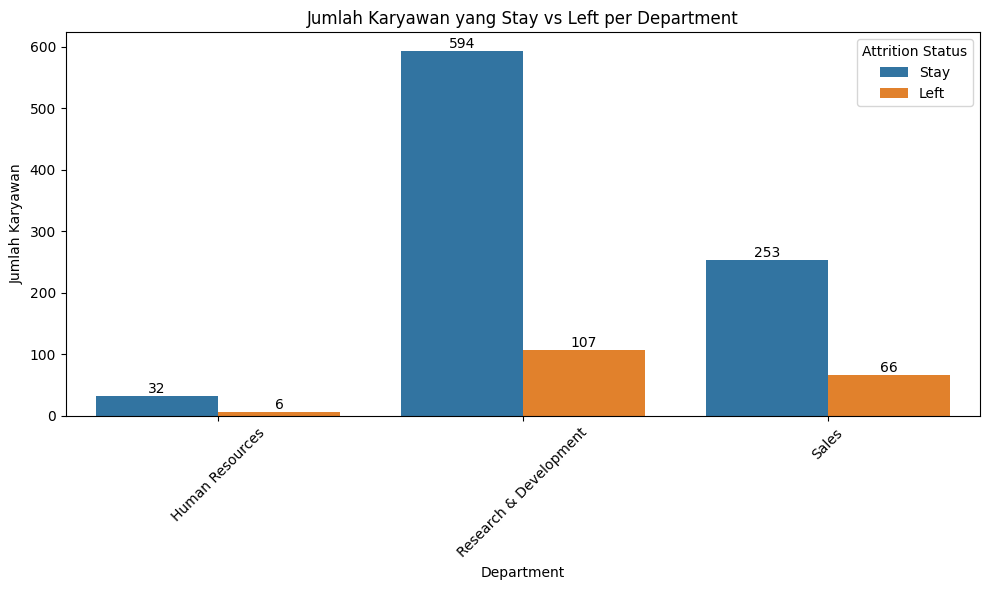

In [12]:
# Hitung jumlah karyawan berdasarkan Department dan Attrition
attrition_counts = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

# Ubah kolom Attrition menjadi label (opsional)
attrition_counts['Attrition'] = attrition_counts['Attrition'].map({0: 'Stay', 1: 'Left'})

# Buat bar chart dan simpan Axes object ke variabel ax
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=attrition_counts, x='Department', y='Count', hue='Attrition')

# Tambahkan data label di atas bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title("Jumlah Karyawan yang Stay vs Left per Department")
plt.xlabel("Department")
plt.ylabel("Jumlah Karyawan")
plt.legend(title="Attrition Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kode ini digunakan untuk menghitung dan memvisualisasikan jumlah karyawan yang tetap bekerja (Stay) dan yang keluar (Left) di setiap departemen. Pertama, data dikelompokkan berdasarkan kombinasi Department dan Attrition, kemudian dihitung jumlahnya menggunakan groupby dan size. Nilai Attrition yang semula berupa angka dikonversi menjadi label kategori untuk memperjelas visualisasi. Selanjutnya, dibuat bar chart menggunakan seaborn dengan parameter hue untuk membedakan status attrition. Label jumlah ditambahkan di atas masing-masing batang menggunakan bar_label untuk memperjelas informasi yang ditampilkan. Visualisasi ini memberikan gambaran yang jelas mengenai distribusi attrition per departemen, dengan tampilan yang rapi dan informatif.

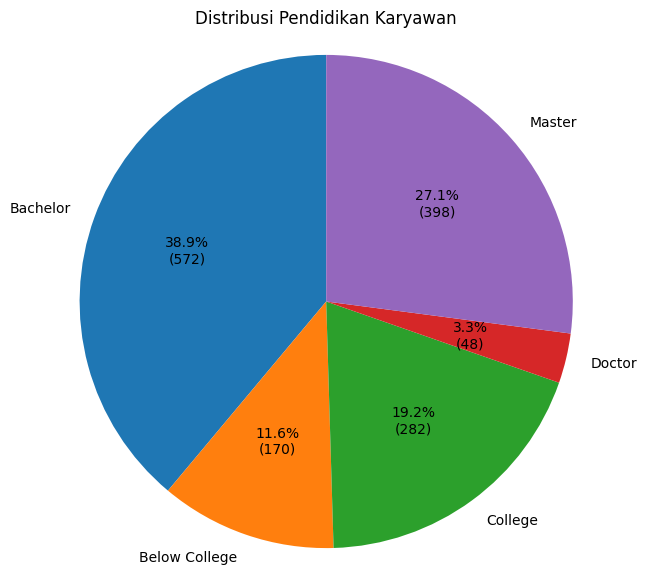

In [13]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Buat Series baru untuk visualisasi, tanpa menambah kolom baru ke df
education_labels = df['Education'].map(education_map)

# Hitung jumlah per kategori pendidikan
edu_counts = education_labels.value_counts().sort_index()

labels = edu_counts.index.tolist()
counts = edu_counts.values.tolist()

# Fungsi gabung persen dan jumlah
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"
    return my_autopct

# Buat pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, autopct=make_autopct(counts), startangle=90)

plt.title('Distribusi Pendidikan Karyawan')
plt.axis('equal')  # Supaya pie bulat
plt.show()

Distribusi tingkat pendidikan karyawan didominasi oleh lulusan Bachelor dengan jumlah 572 data, diikuti oleh lulusan Master sebanyak 398. Sementara itu, tingkat pendidikan dengan jumlah paling sedikit adalah Doctor, yaitu sebanyak 48 data.

<ipython-input-14-f4845064f83f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSatisfaction', data=df, palette='Blues')
<ipython-input-14-f4845064f83f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WorkLifeBalance', data=df, palette='Greens')


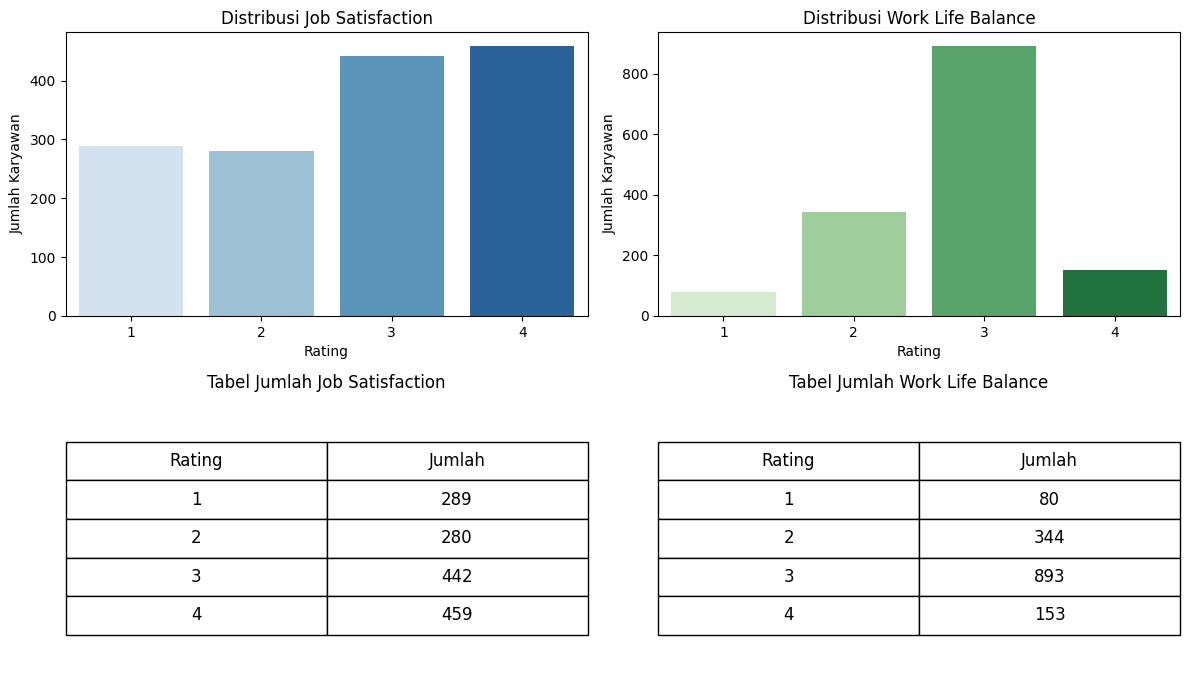

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12,7))  # Tambah tinggi supaya muat tabel

# Job Satisfaction
plt.subplot(2, 2, 1)
sns.countplot(x='JobSatisfaction', data=df, palette='Blues')
plt.title('Distribusi Job Satisfaction')
plt.xlabel('Rating')
plt.ylabel('Jumlah Karyawan')

# Job Satisfaction summary table
job_counts = df['JobSatisfaction'].value_counts().sort_index()
plt.subplot(2, 2, 3)  # Bawah plot 1
plt.axis('off')  # Hide axis

# Buat tabel data
job_table = pd.DataFrame({'Rating': job_counts.index, 'Jumlah': job_counts.values})
table = plt.table(cellText=job_table.values,
                  colLabels=job_table.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Lebar, tinggi cell

plt.title('Tabel Jumlah Job Satisfaction')

# Work Life Balance
plt.subplot(2, 2, 2)
sns.countplot(x='WorkLifeBalance', data=df, palette='Greens')
plt.title('Distribusi Work Life Balance')
plt.xlabel('Rating')
plt.ylabel('Jumlah Karyawan')

# Work Life Balance summary table
wlb_counts = df['WorkLifeBalance'].value_counts().sort_index()
plt.subplot(2, 2, 4)  # Bawah plot 2
plt.axis('off')

wlb_table = pd.DataFrame({'Rating': wlb_counts.index, 'Jumlah': wlb_counts.values})
table = plt.table(cellText=wlb_table.values,
                  colLabels=wlb_table.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

plt.title('Tabel Jumlah Work Life Balance')

plt.tight_layout()
plt.show()

Berdasarkan distribusi data, mayoritas karyawan di perusahaan Jaya Jaya Maju memberikan penilaian pada tingkat 3 dan 4 untuk indikator Job Satisfaction. Pola serupa juga terlihat pada indikator Work Life Balance, yang juga didominasi oleh rating 3 dan 4. Hal ini mengindikasikan bahwa secara umum, karyawan merasa cukup puas terhadap pekerjaannya dan memiliki keseimbangan kehidupan kerja yang baik.

# **Data Cleaning**

In [15]:
df_cleaned = df.copy()

In [16]:
# Data yang lengkap (punya label)
df_train = df_cleaned[df_cleaned['Attrition'].notnull()]
# Data tanpa label (kosong)
df_unlabeled = df_cleaned[df_cleaned['Attrition'].isnull()]

In [17]:
df_train.to_csv('attrition_terbaru.csv', index=False)

Dataset dibagi menjadi dua bagian untuk keperluan pemodelan dan interpretasi hasil:

### 1. `df_train`
- Dataset ini digunakan untuk pelatihan (training) model.
- Seluruh data pada dataset ini **tidak mengandung nilai null**, terutama pada kolom target `Attrition`.
- Digunakan sebagai data utama dalam proses pembelajaran mesin karena bersih dan lengkap.

### 2. `df_unlabeled`
- Dataset ini digunakan untuk proses interpretasi hasil model setelah pelatihan.
- Kolom `Attrition` pada dataset ini **bernilai null**, sehingga tidak digunakan dalam proses pelatihan.
- Setelah model dilatih menggunakan `df_train`, nilai `Attrition` pada dataset ini akan **diprediksi dan diisi oleh model**.

Dengan pembagian ini, proses pelatihan model menjadi lebih akurat dan hasil prediksi dapat diterapkan langsung pada data yang belum diketahui status `Attrition`-nya.

### **Handling Unrelevant Columns**

In [18]:
df_train = df_train.drop(['EmployeeId', 'Over18', 'StandardHours'], axis=1)

Berdasarkan hasil visualisasi **heatmap korelasi**, dilakukan identifikasi terhadap kolom-kolom yang memiliki tingkat korelasi rendah terhadap variabel target `Attrition`. Kolom-kolom tersebut dianggap **tidak memiliki kontribusi signifikan** dalam proses prediksi.


### **Label Encoding**

In [19]:
# 2. Label Encoding untuk kolom biner
df_train['Gender'] = df_train['Gender'].map({'Male': 0, 'Female': 1})
df_train['OverTime'] = df_train['OverTime'].map({'No': 0, 'Yes': 1})

# 3. One-Hot Encoding untuk kolom nominal
one_hot_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df_train = pd.get_dummies(df_train, columns=one_hot_columns, drop_first=True)  # drop_first=True untuk menghindari dummy trap

Untuk mempersiapkan data sebelum proses pemodelan, dilakukan encoding pada fitur-fitur kategorikal sebagai berikut:

### 1. Encoding Label (Label Encoding)
- Fitur `Gender` dan `OverTime` memiliki dua kategori (biner), sehingga dilakukan proses encoding menggunakan **label encoding**.
- Tujuannya adalah untuk mengubah nilai kategorikal menjadi representasi numerik sederhana (misalnya: Laki-laki = 1, Perempuan = 0).

### 2. One-Hot Encoding
- Fitur `BusinessTravel`, `Department`, `EducationField`, `JobRole`, dan `MaritalStatus` memiliki lebih dari dua kategori.
- Oleh karena itu, kelima kolom ini diencode menggunakan **one-hot encoding**, yaitu mengubah setiap kategori unik menjadi kolom biner tersendiri.

# **Split Data**

In [20]:
df_rf = df_train.copy()   # untuk random forest
df_knn = df_train.copy()  # untuk knn (scaling dilakukan di sini)

Agar proses pelatihan pada dua model berbeda tidak saling memengaruhi, dataset `df_train` diduplikasi menjadi dua salinan terpisah:

- **`df_rf`**: Salinan `df_train` yang akan digunakan khusus untuk pelatihan model **Random Forest**.
- **`df_knn`**: Salinan `df_train` yang akan digunakan khusus untuk pelatihan model **K-Nearest Neighbors (KNN)**.


In [21]:
# Untuk Random Forest
X_rf = df_rf.drop('Attrition', axis=1)
y_rf = df_rf['Attrition']
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Untuk KNN
X_knn = df_knn.drop('Attrition', axis=1)
y_knn = df_knn['Attrition']
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

Sebelum melakukan pembagian data menjadi set pelatihan dan pengujian, kolom `Attrition` dipisahkan terlebih dahulu sebagai variabel target (`y`) untuk kedua dataset pemodelan, yaitu `df_rf` dan `df_knn`.

Langkah-langkahnya:
1. Pisahkan kolom `Attrition` dari fitur lainnya untuk mendapatkan variabel target (`y_rf` dan `y_knn`) dan fitur (`X_rf` dan `X_knn`).
2. Lakukan pembagian data menjadi data pelatihan dan pengujian (train-test split) secara terpisah untuk masing-masing dataset, agar kedua model dapat dilatih dan diuji secara independen.

# **Modelling and Evaluation**

### **KNN Modelling**

In [22]:
# Buat pipeline scaling + model
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Fit pipeline dengan data training
pipeline_knn.fit(X_knn_train, y_knn_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [23]:
# Evaluasi di data test
y_knn_pred = pipeline_knn.predict(X_knn_test)

Kode tersebut membuat pipeline machine learning yang terdiri dari dua tahap: pertama, melakukan standarisasi fitur menggunakan StandardScaler agar setiap fitur memiliki skala yang sama, dan kedua, menerapkan algoritma klasifikasi K-Nearest Neighbors (KNN) dengan 5 tetangga terdekat. Pipeline ini kemudian dilatih menggunakan data pelatihan X_knn_train dan y_knn_train, sehingga proses scaling dan pelatihan model dilakukan secara berurutan dan otomatis dalam satu langkah.

### **KNN Evaluation**

Accuracy : 0.8302
Precision: 0.8000
Recall   : 0.1026
F1-Score : 0.1818


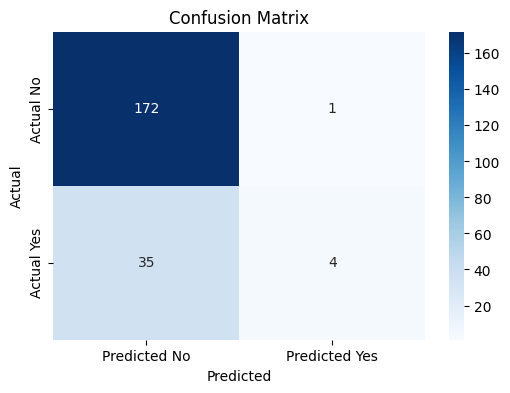

In [24]:
# Hitung metrik
acc = accuracy_score(y_knn_test, y_knn_pred)
prec = precision_score(y_knn_test, y_knn_pred)
rec = recall_score(y_knn_test, y_knn_pred)
f1 = f1_score(y_knn_test, y_knn_pred)
cm = confusion_matrix(y_knn_test, y_knn_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Hasil evaluasi model menunjukkan bahwa meskipun **akurasinya cukup tinggi (83,02%), nilai precision (80%) dan terutama recall (10,26%) serta F1-score (18,18%) sangat rendah.** Ini mengindikasikan bahwa model banyak melewatkan (gagal mendeteksi) kasus positif, sehingga performanya buruk dalam mendeteksi kelas minoritas, **meskipun secara keseluruhan tampak akurat karena kemungkinan data tidak seimbang.**

### **Random Forest Modelling**

In [25]:
# Buat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train model
rf_model.fit(X_rf_train, y_rf_train)

RandomForestClassifier(random_state=42)

Kode tersebut membuat dan melatih model Random Forest untuk klasifikasi. Pertama, objek model rf_model dibuat menggunakan RandomForestClassifier dari pustaka sklearn.ensemble, dengan parameter **n_estimators=100** yang berarti model akan menggunakan 100 pohon keputusan dalam ensemble-nya, dan **random_state=42** untuk memastikan hasil yang konsisten setiap kali dijalankan. Selanjutnya, model dilatih menggunakan data pelatihan X_rf_train (fitur) dan y_rf_train (label) dengan memanggil metode .fit(), sehingga model belajar pola dari data untuk digunakan dalam prediksi selanjutnya.

### **Random Forest Evaluation**

=== Evaluation Metrics ===
Accuracy : 0.8443
Precision: 1.0000
Recall   : 0.1538
F1-Score : 0.2667


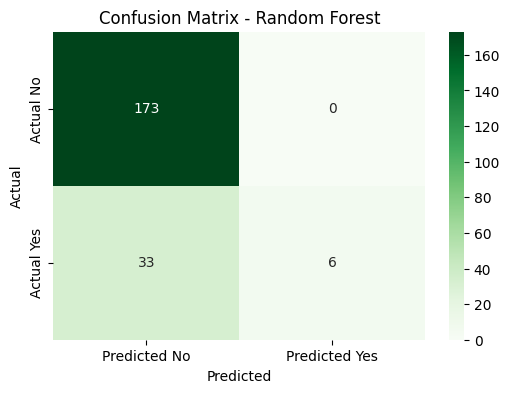

In [26]:
# Prediksi
y_rf_pred = rf_model.predict(X_rf_test)

# Evaluasi
acc = accuracy_score(y_rf_test, y_rf_pred)
prec = precision_score(y_rf_test, y_rf_pred)
rec = recall_score(y_rf_test, y_rf_pred)
f1 = f1_score(y_rf_test, y_rf_pred)
cm = confusion_matrix(y_rf_test, y_rf_pred)

print("=== Evaluation Metrics ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Hasil evaluasi model Random Forest menunjukkan bahwa **akurasi model cukup tinggi, yaitu 84,43%, dan precision sempurna (1.0000), yang berarti semua prediksi positif benar. Namun, recall sangat rendah (15,38%), menunjukkan bahwa model hanya berhasil menangkap sebagian kecil dari seluruh kasus positif yang sebenarnya ada. F1-score pun rendah (26,67%), mengindikasikan ketidakseimbangan antara precision dan recall.** Ini menunjukkan bahwa meskipun model sangat yakin saat memprediksi positif,**ia sangat jarang melakukannya — kemungkinan besar karena dataset tidak seimbang, sehingga model cenderung mengabaikan kelas minoritas.**

In [30]:
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(X_rf_train.columns, 'X_rf_train_columns.pkl')

['X_rf_train_columns.pkl']

Setelah membandingkan hasil kedua model, Random Forest dinilai sebagai model yang paling baik berdasarkan metrik evaluasi. Oleh karena itu, model Random Forest tersebut disimpan secara permanen, sehingga dapat dengan mudah digunakan kembali tanpa perlu melatih ulang.

                              Feature  Importance
11                      MonthlyIncome    0.063835
0                                 Age    0.061952
12                        MonthlyRate    0.055121
1                           DailyRate    0.052727
14                           OverTime    0.050790
19                  TotalWorkingYears    0.048801
2                    DistanceFromHome    0.044447
7                          HourlyRate    0.043398
22                     YearsAtCompany    0.037496
13                 NumCompaniesWorked    0.035286
5             EnvironmentSatisfaction    0.032825
15                  PercentSalaryHike    0.032263
8                      JobInvolvement    0.031229
25               YearsWithCurrManager    0.028298
18                   StockOptionLevel    0.027148
23                 YearsInCurrentRole    0.025913
10                    JobSatisfaction    0.024892
20              TrainingTimesLastYear    0.024053
17           RelationshipSatisfaction    0.023778


<ipython-input-28-a38f86563b1d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


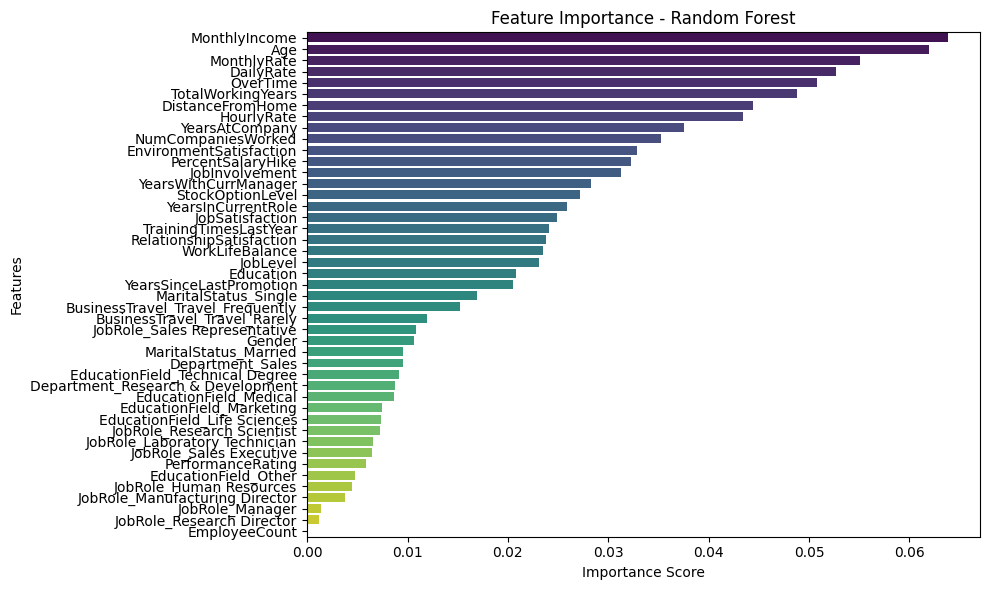

In [28]:
# Ambil nama fitur dari data training
feature_names = X_rf_train.columns

# Ambil nilai feature importance dari model
importances = rf_model.feature_importances_

# Buat DataFrame untuk keperluan visualisasi
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan tabel
print(feat_imp_df)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [29]:
# feat_imp_df.to_csv("feature_importance_attrition.csv", index=False)